# Decision Tree

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read dataset

In [3]:
import pandas as pd 
df = pd.read_csv('Datasets/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.drop(columns =['target'])
Y = df[['target']]

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


### data preprocessing


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipeline = Pipeline(steps =[('impute',SimpleImputer(strategy='mean')),
                                ('scaler',StandardScaler())])

In [9]:
x_pre = num_pipeline.fit_transform(X)
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [10]:
cols= num_pipeline.get_feature_names_out()
cols

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [11]:
X_pre = pd.DataFrame(x_pre,columns=[cols])
X_pre.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Decision tree model

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='entropy')
model.fit(xtrain,ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
xtrain.shape

(100, 4)

In [23]:
xtest.shape

(50, 4)

In [24]:
model.score(xtrain,ytrain)

0.67

In [25]:
model.score(xtest,ytest)

0.66

### Hyperparameter tuning

In [26]:
param = {'max_depth':[1,2,3,4,5,6,7],
         'min_samples_split':[5,6,7,8,9],
         'criterion':['gini','entropy']}

In [28]:
from sklearn.model_selection import GridSearchCV
dtc =DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=param, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...], 'min_samples_split': [5, 6, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [32]:
gscv.best_params_


{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6}

In [31]:
gscv.best_score_

np.float64(1.0)

In [34]:
best_dtc = gscv.best_estimator_
best_dtc

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,6
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
best_dtc.score(xtrain,ytrain)

1.0

In [38]:
best_dtc.score(xtest,ytest)

0.94

### predict species using best DTC

In [39]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [40]:
ypred_tr[0:5]

array([1, 0, 1, 2, 1])

In [41]:
ytrain.head()

,target
52,1
49,0
65,1
118,2
55,1


In [42]:
ypred_ts[0:5]

array([1, 0, 0, 0, 1])

In [43]:
ytest.head()

,target
92,1
44,0
7,0
21,0
95,1


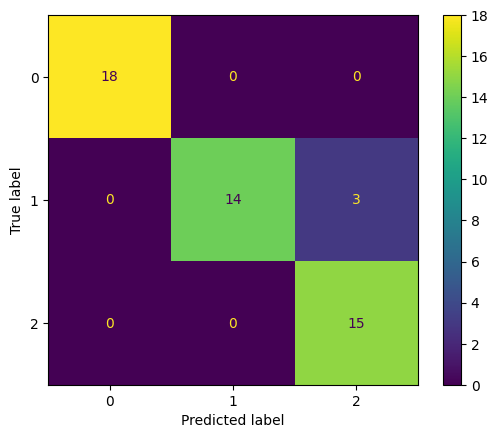

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



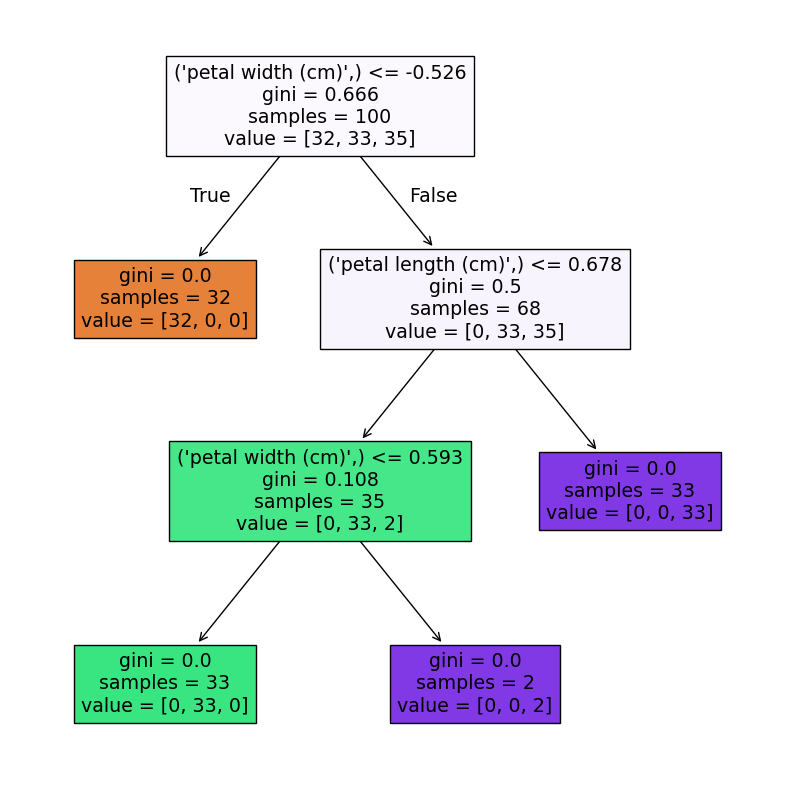

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10)) 
plot_tree(best_dtc, feature_names=list(xtrain.columns), filled=True)
plt.show()